> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project 2: Investigate a Dataset (TMDB Movie Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I have analysed the TMDB dataset. This dataset contains information related to around 10,000 movies collected from TMDB (www.themoviedb.org). It includes information about movie's budget, revenue, viewer's rating, genres, production companies, director, casting, keywords associated with movies, popularity of the movies and runtime.

This dataset can help to understand various factors like profitability, the trend around runtime, popularity over the years; popular genres for the profitability, connection between popularity ratings and profit; reveal information like profitable directors, casts and production companies over the span.

I am focusing on answering the following questions as part of this project:

1. What is the trend of number of movies released each year?
2. What are the most profitable, highest revenue and highest budget movies?
3. When the cast and directors work together, do they make profitable movies?
4. What is the highest revenue movie in each of recent years?
5. Which are some of the most used keywords in recent profitable movies?

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Style and size of graph

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,10)})

<a id='wrangling'></a>
## Data Wrangling

During this step, we are going to import the csv file and display its main information. 
We will perform the following steps:

Display the info of the dataset and get the idea of the size, number of records and number of columns and then we will try to familiarize with the dataset and find any unusal values


In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#importing csv dataset

df = pd.read_csv('tmdb-movies.csv')
print("Original TMDB Dataset contains (Rows,Columns) : ",df.shape)
df.shape


Original TMDB Dataset contains (Rows,Columns) :  (10866, 21)


(10866, 21)

In [10]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
#check basic information of the dataset
print("Quick look at the dataset for some statistical values: \n\n")
df.describe()

Quick look at the dataset for some statistical values: 




,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8.666000e+03,8.666000e+03
mean,0.741937,3.168507e+07,9.176898e+07,103.815140,264.204823,6.003612,2000.129818,3.807851e+07,1.184674e+08,6.008391e+07,8.038889e+07
std,1.087657,2.943537e+07,1.201090e+08,26.207186,635.195808,0.893539,13.221278,3.161087e+07,1.472982e+08,1.034574e+08,1.332466e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.000000e+00,-4.139124e+08,-4.139124e+08
25%,0.249990,1.600000e+07,3.202747e+07,91.000000,20.000000,5.500000,1993.000000,2.189312e+07,4.434158e+07,8.960966e+06,1.385879e+07
50%,0.449377,3.073943e+07,8.922066e+07,100.000000,54.000000,6.100000,2004.000000,3.688774e+07,1.150774e+08,5.848123e+07,7.818962e+07
75%,0.842984,3.073943e+07,8.922066e+07,113.000000,200.000000,6.600000,2011.000000,3.688774e+07,1.150774e+08,5.915303e+07,7.818962e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


In [14]:
#Check column names and types
print("Column name with number of null values, count of value in each column and data type: \n\n")
df.info()

Column name with number of null values, count of value in each column and data type: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-n

## TMDB Data Cleaning and preparation for Analysis
Observations:

The columns "id", "imdb_id", "homepage", "tagline" and "overview" are not relevant for this analysis, we can remove them.

The "cast", "director", "genres" and "production companies" are mutivalued fields and separated by "|". As required for the analysis, we should split the values as single entry fields.

The budget_adj and revenue_adj are displayed in scientific format. For this analysis, the fields are converted to int from float and we have assumed the currency in dollars.

As we are comparing movies from different periods, we should keep the adjusted budgets and revenues to account for the inflation over years.

Some columns have a significant number of missing values and for our analysis, we have replaced missing values fields with a placeholder text.

There are some invalid characters in cast and keywords, in our analysis of top keywords and casts, those are not creating any issues, so we have not cleaned those columns.

The budget, revenue, budget_adj, revenue_adj first quartiles and medians are equal to 0, we have replaced those with min value.

Steps to clean the data:

Delete rows with NaN values.

Delete Duplicate values.

Changing format of release date into datetime format.

Change format of budget_adj and revenue_adj to int from float.

In [49]:
print("Count of 0 values in columns:\n\n ")
df.isin([0]).sum()

Count of 0 values in columns:

 


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 7
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              2
revenue_adj             0
profit                  1
profit_adj              1
dtype: int64

In [17]:
#check NaN values
print("Count of NaN values in columns:\n\n ")
df.isna().sum()

Count of NaN values in columns:

 


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
#replace 0 values with NaN
df['budget'] = df['budget'].replace(0,np.NAN)
df['budget_adj'] = df['budget_adj'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0,np.NAN)

#Fill 0 values with min values
df.fillna(df.mean(), inplace=True)
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
#check duplicate count
print("Duplicates are indicated by True:\n ")
(df.duplicated()).value_counts()

Duplicates are indicated by True:
 


False    10865
True         1
dtype: int64

In [20]:
#Delete rows with NaN values

df.dropna(inplace=True)
df.shape
print("Afetr Removing NaN (Rows,Columns) : ",df.shape)

Afetr Removing NaN (Rows,Columns) :  (8667, 16)


In [21]:
#Delete duplicates

df.drop_duplicates(inplace = True)
print("After Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (8666, 16)


In [22]:
# Changing the format of dates:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

In [23]:

print("Year range - ", df.release_year.min(),df.release_year.max())

Year range -  1960 2015


In [24]:
values = {'keywords': 'Keywords Missing', 'production_companies': 'production_companies Missing', 'cast': 'cast missing'}
df.fillna(value=values, inplace = True)

In [25]:
#check NaN values again
print("Now after cleaning, count of NaN values in columns:\n\n ")
df.isna().sum()

Now after cleaning, count of NaN values in columns:

 


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [53]:
#function to convert float to int
def float_to_int(number):
    return np.int(number)

# Applying the function ot columns budget_adj and revenue_adj 
df['budget_adj'] = df['budget_adj'].apply(float_to_int)
df['revenue_adj'] = df['revenue_adj'].apply(float_to_int)

# Creating profit and adjusted profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

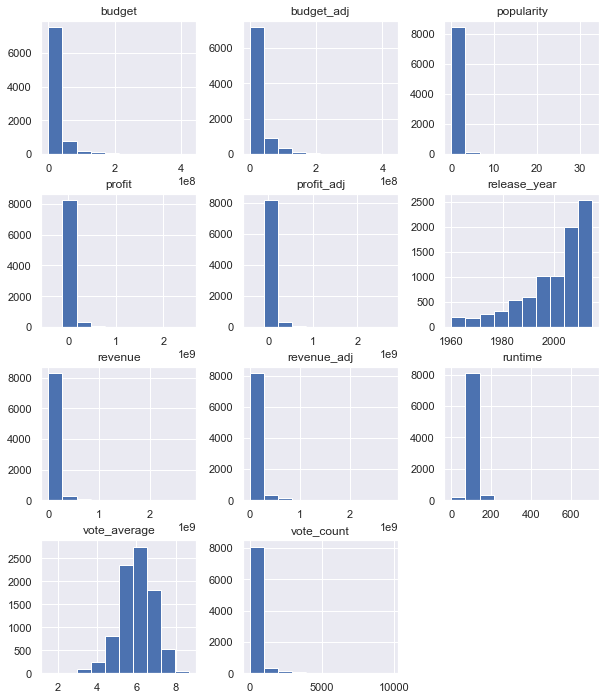

In [54]:
df.hist(figsize=(10,12));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

1. What is the trend of number of movies released each year?

Text(0, 0.5, 'movies')

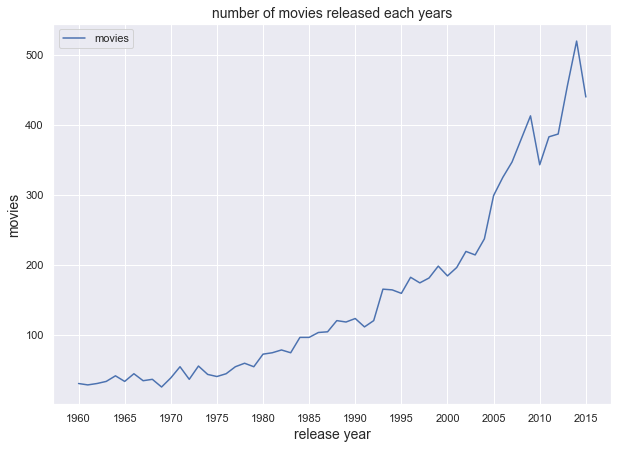

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_movies = df.groupby(['release_year']).agg(movies=('original_title', 'count'))

df_movies.head(60).plot(xticks = np.arange(1960,2016,5),figsize=(10,7))

#setup the title of the figure
plt.title("number of movies released each years",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('release year',fontsize = 14)
plt.ylabel('movies',fontsize = 14)

1. The number of movies released increases year on year
2. Between year 2010 and 2015, there was a steep increase in the numer of moviees that were released.

2. What are the most profitable, highest revenue and highest budget movies?

Text(0.5, 1.0, 'highest profited movies')

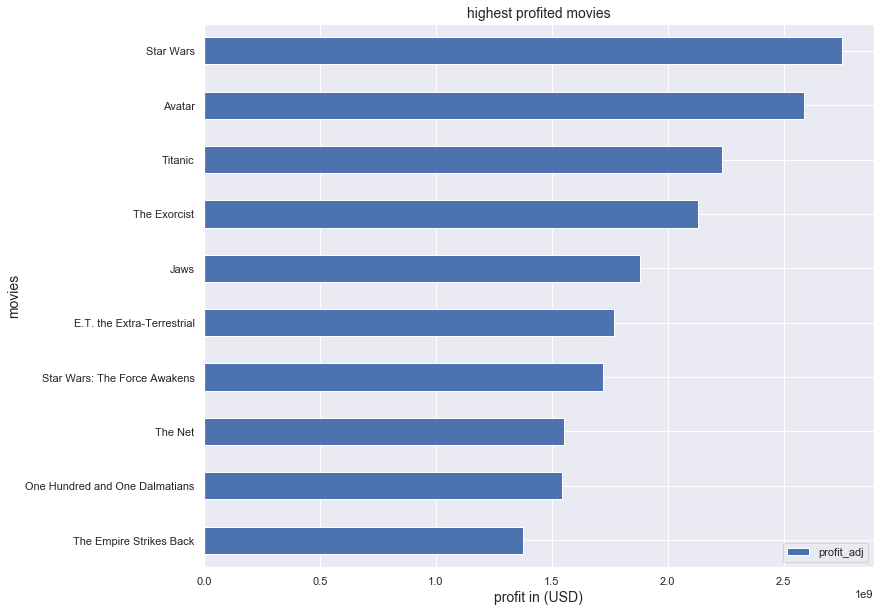

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#create new dataset for movie profit calculation
df_movie_profit = pd.melt(df, id_vars = ['original_title'], value_vars = ['profit_adj'], value_name = 'profit_adj')

df_movie_profit.sort_values(['profit_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');
plt.gca().invert_yaxis()
# Graph features
plt.xlabel('profit in (USD)', fontsize = 14)
plt.ylabel('movies', fontsize = 14)
plt.title('highest profited movies', fontsize = 14)


The movie with the Highest profit was Star Wars and the least profit was The Empire Strikes Back

2b. High Revenue Movies

Text(0.5, 1.0, 'highest revenue movies')

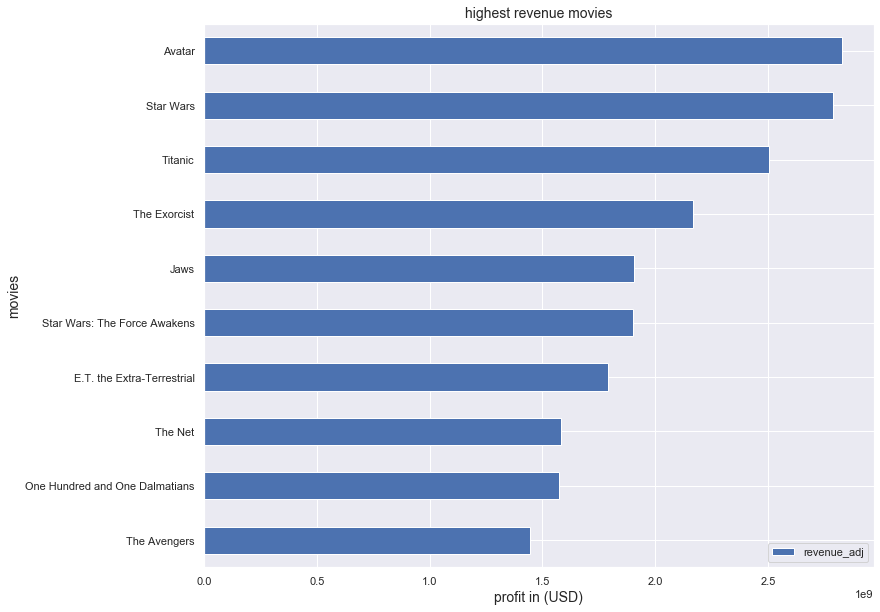

In [33]:
#create new dataset for movie revenue calculation
df_movie_revenue = pd.melt(df, id_vars = ['original_title'], value_vars = ['revenue_adj'], value_name = 'revenue_adj')

df_movie_revenue.sort_values(['revenue_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
# Graph features
plt.xlabel('profit in (USD)', fontsize = 14)
plt.ylabel('movies', fontsize = 14)
plt.title('highest revenue movies', fontsize = 14)

Avatar ahd the highest revenue and The Avengers had the lowest revvenue

2c. High Budget Movies

Text(0.5, 0, 'Budget in (USD)')

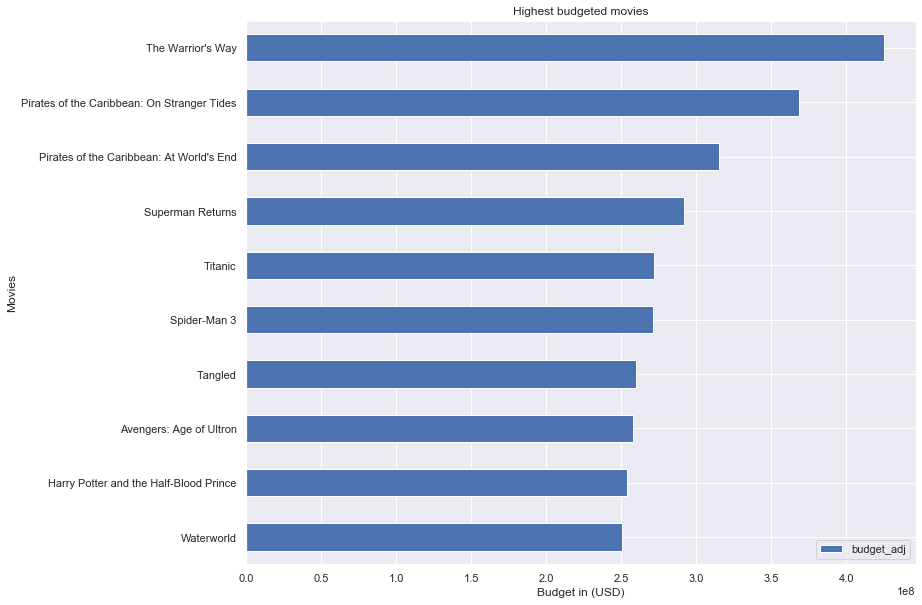

In [34]:
#create new dataset for movie budget calculation
df_movie_budget = pd.melt(df, id_vars = ['original_title'], value_vars = ['budget_adj'], value_name = 'budget_adj')

df_movie_budget.sort_values(['budget_adj'], ascending = False).head(10).plot(kind = 'barh', x = 'original_title');

plt.gca().invert_yaxis()
plt.title("Highest budgeted movies")
plt.ylabel("Movies")
plt.xlabel("Budget in (USD)")

The warwick's Way was the most budgeted movie and Waterworld had the least budget

3. When the cast and directors work together, do they make profitable movies?

In [39]:
#Create a dataset for movies made $100M or more profit

df_profited = df[df['profit_adj'] >= 100000000]

#Create a subset of above dataset to limit that to recent years
df_recent_years = df_profited[df_profited['release_year'] >= 2009]

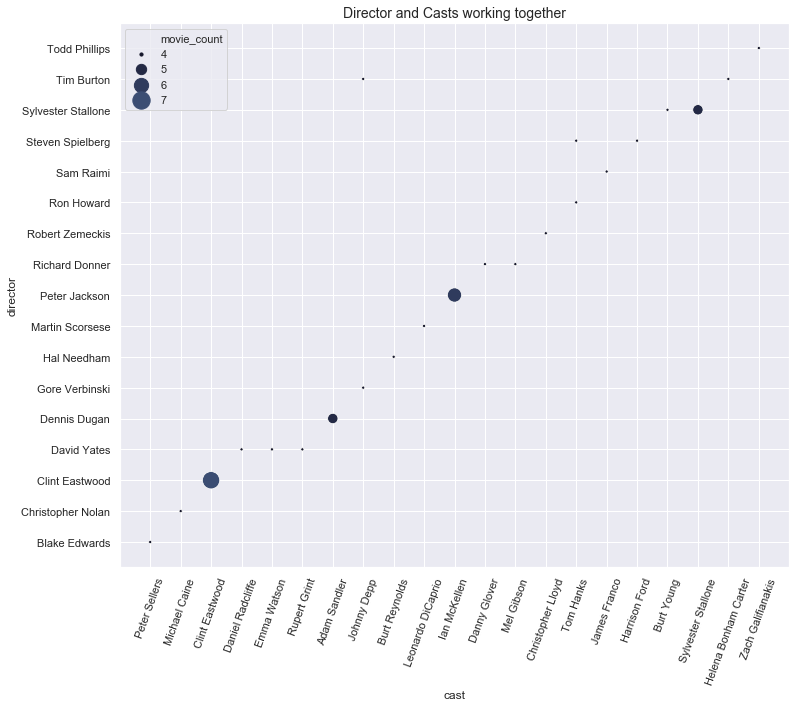

In [40]:
#Split cast

df_cast = df_profited.assign(cast = df_profited['cast'].str.split('|')).explode('cast')

#Split director

df_cast_dir = df_cast.assign(director = df_cast['director'].str.split('|')).explode('director')

df_cast_dir['cast_director'] = df_cast_dir['director'] + ";" + df_cast_dir['cast']

df_merge = df_cast_dir.groupby('cast_director').agg(movie_count=('original_title', 'count'),cast=('cast','first'),director=('director','first'))

df_merge = df_merge[df_merge.movie_count > 3]
df_merge.drop(df_merge.index)
df_merge.sort_values(['movie_count'], ascending = False).head(20)

n = df_merge['movie_count'] * 0.02

cmap = sns.cubehelix_palette(dark=.3, light=.1,rot=-.2, as_cmap=True)

sns.scatterplot(x="cast", y="director",
                     hue="movie_count", size="movie_count",
                     palette=cmap, sizes=(10, 300),
                     data=df_merge)
plt.xticks(rotation=70)
plt.title('Director and Casts working together', fontsize = 14)

plt.show()
                

Some directors also perform as cast for more profitable movies e.g Clint Eastwood.

David Yates, Steven Spilberg, Sylvester Stallone and Tim Burton like to work with same casts repeatedly

4. What is the highest revenue movie in each of recent years?

Text(0.5, 1, 'most profitable movies per year')

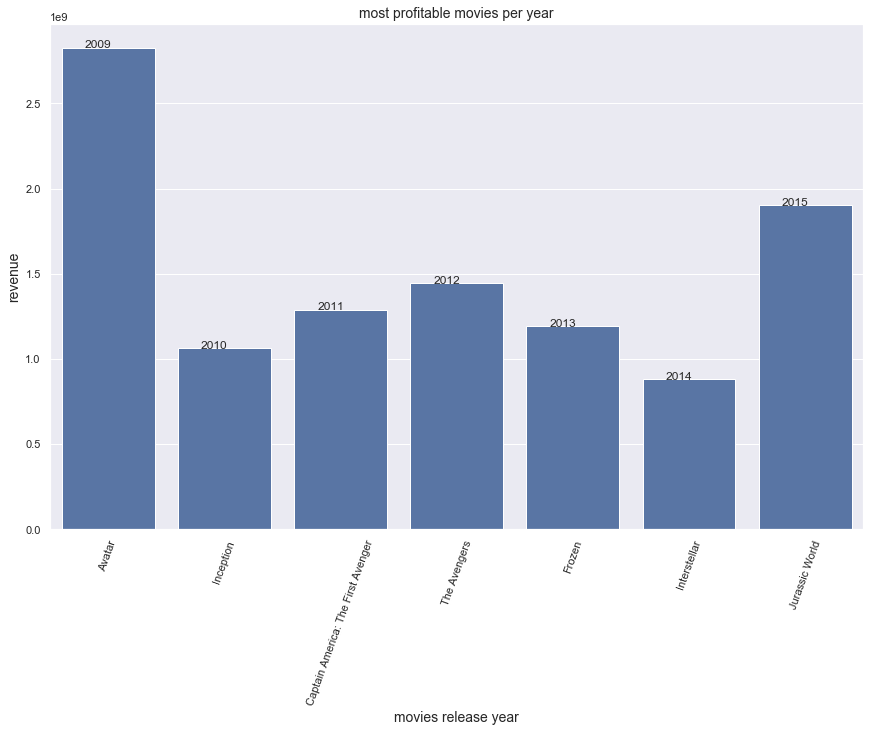

In [41]:
df_max_rev = df_recent_years.groupby(['release_year']).agg(revenue_max=('revenue_adj', max),movie=('original_title', 'first'),year=('release_year',min))

high_revenue = df_max_rev['revenue_max'].to_numpy()
movies = df_max_rev['movie'].to_numpy()
year = df_max_rev['year'].to_numpy()

g = sns.barplot(data=df_max_rev,x = movies, y = high_revenue, color = "b");
plt.xticks(rotation=70)
plt.tight_layout()
i = 0

for p in g.patches:
        x = p.get_x() + 0.2
        y = p.get_y() + p.get_height()
        g.annotate(year[i], (x, y))
        i +=1
    
# Graph features
plt.xlabel('movies release year', fontsize = 14)
plt.ylabel('revenue', fontsize = 14)
plt.title('most profitable movies per year', fontsize = 14)

Most profitable movie = Avatar

5. Which are some of the most used keywords in recent profitable movies?

Text(0.5, 1, 'most popular keywords in recent years')

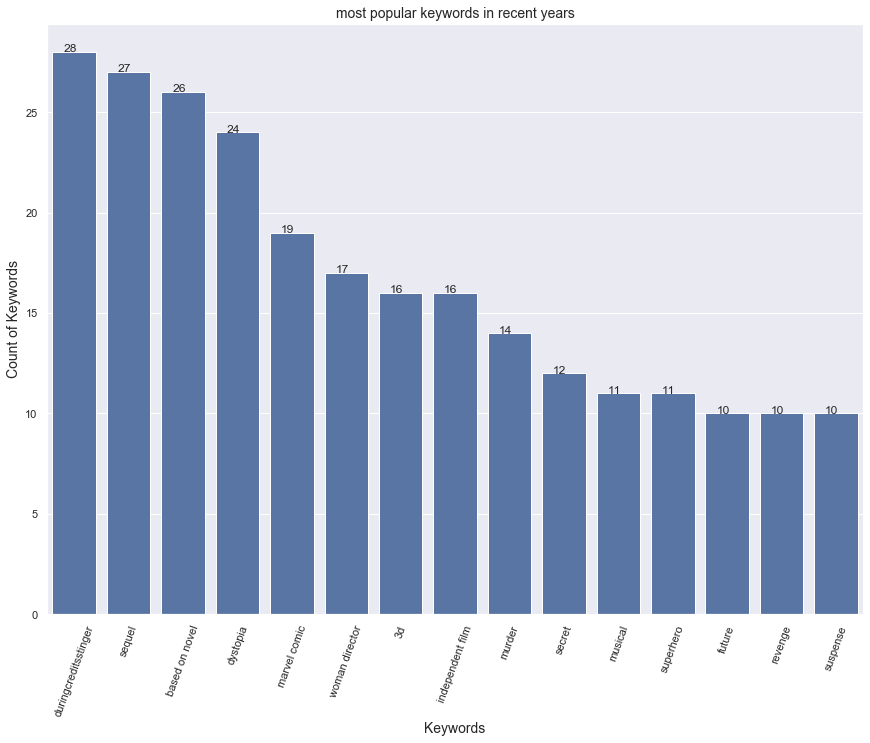

In [42]:
#Split keywords

df_keywords = df_recent_years.assign(keywords = df_profited['keywords'].str.split('|')).explode('keywords')
df_key = df_keywords.groupby(['keywords']).agg(keywords=('keywords','first'),keywords_count=('keywords','count'))

df_key.head()
df_key = df_key[df_key.keywords_count > 9]
df_key.drop(df_key.index)

df_key = df_key.sort_values(['keywords_count'], ascending = False)

keywords = df_key['keywords'].to_numpy()
keywords_count = df_key['keywords_count'].to_numpy()

g = sns.barplot(data=df_key,x =keywords, y =keywords_count, color = "b");
plt.xticks(rotation=70)
plt.tight_layout()

i = 0

for p in g.patches:
        x = p.get_x() + 0.2
        y = p.get_y() + p.get_height()
        g.annotate(keywords_count[i], (x, y))
        i +=1
    
# Graph features
plt.xlabel('Keywords', fontsize = 14)
plt.ylabel('Count of Keywords', fontsize = 14)
plt.title('most popular keywords in recent years', fontsize = 14)

The chart above shows the most frequent keywords that were used in recent years for profitable movies.

<a id='conclusions'></a>
## Conclusions

In conclusion, the findings from this analysis shows that more profit were made between 2009 - 2015.

1. Avatar scored the highest revenue in recent years from 2009 - 2015
2. There is a correlation between budget, revenue and profit as it was seen that movies with more budgets and great casts leads to more profit
3. Most frequent keywords during recent years for profitable movies are during credit stinger, sequel, based on novel.
4. The most profitable movie is Star wars followed by Avatar and Titanic. Those movies also generated the highest revenue.

Limitations
1. The findings are likely to change as there is no form of machine learning nor statistical inference that has been done.

Reference

1. Pandas.pydata.org
2. github.com